In [125]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df = df.drop(df[['RowNumber','CustomerId','Surname']],axis=1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [115]:
df = pd.get_dummies(data = df,columns=['Geography'],dtype='int')
df['Gender'].replace({'Female':1,'Male':0},inplace =True)
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [116]:
scaler = MinMaxScaler()
df[['Balance','EstimatedSalary','Age','CreditScore','Tenure','NumOfProducts']]= scaler.fit_transform(df[['Balance','EstimatedSalary','Age','CreditScore','Tenure','NumOfProducts']])
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [117]:
df.isna().sum(), df.shape

(CreditScore          0
 Gender               0
 Age                  0
 Tenure               0
 Balance              0
 NumOfProducts        0
 HasCrCard            0
 IsActiveMember       0
 EstimatedSalary      0
 Exited               0
 Geography_France     0
 Geography_Germany    0
 Geography_Spain      0
 dtype: int64,
 (10000, 13))

In [118]:
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [119]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7919 - loss: 0.5606
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7900 - loss: 0.4767
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7965 - loss: 0.4600
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7991 - loss: 0.4464
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8013 - loss: 0.4411
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7942 - loss: 0.4419
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4301
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8078 - loss: 0.4282
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8106 - loss: 0.4247
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8293 - loss: 0.4042
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8331 - loss: 0.3957
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [120]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8523 - loss: 0.3540


[0.35119539499282837, 0.8569999933242798]

In [121]:
y_pred = model.predict(X_test)
y_pred[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.04852603],
       [0.02568467],
       [0.19965313],
       [0.15725334],
       [0.06239097]], dtype=float32)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [124]:
cm = confusion_matrix(y_test,np.round(y_pred))
cm

array([[1502,  105],
       [ 181,  212]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

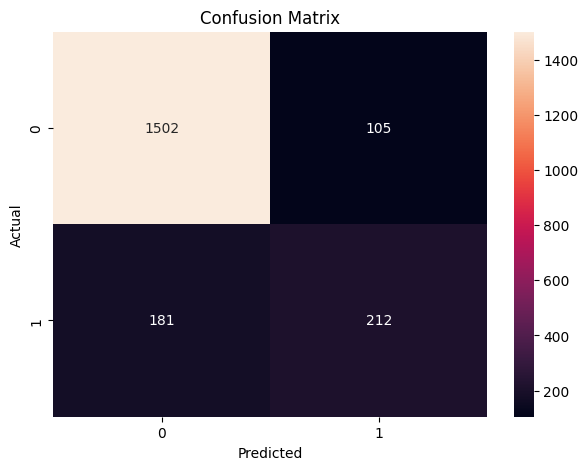

In [126]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')